# Data source: Ontario Data Catalogue: School board achievements and progress dataset
 https://data.ontario.ca/dataset/school-board-achievements-and-progress

In [9]:
# Install Viualization Module packages and load librairies
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [ ]:
# Read Excel dataset using pandas and assign to dataframe 'df'pd
# Notes: 1. file located on my desktop hardrive, and 2. reading a specific Excel worksheet
# https://www.youtube.com/watch?v=2FntKvSPGmU - YouTube video
# Resorted to AI to solve the encoding problem

# Read CSV file
df = pd.read_csv(r'C:\Users\CECi\Dropbox\Data Science Course\Module Visualization\Assignment_3\DSB_achievement_OMEdata_OCT2025.csv', encoding='latin-1') # File is in a different directory - use r

In [23]:
# Check df file import

# Check column headings
print(df.head()) 

  Board Number                    Board Name Board Language      Board Type  \
0       B28010                    Algoma DSB        English          Public   
1       B67202  Algonquin and Lakeshore CDSB        English  Roman Catholic   
2       B66010             Avon Maitland DSB        English          Public   
3       B66001                 Bluewater DSB        English          Public   
4       B67164  Brant Haldimand Norfolk CDSB        English  Roman Catholic   

        Region              City  Grade 6 EQAO Reading Results  \
0  North Region  Sault Ste Marie                          0.72   
1   East Region          Napanee                          0.81   
2   West Region         Seaforth                          0.80   
3   West Region          Chesley                          0.76   
4   West Region        Brantford                          0.83   

   Progress in Grade 6 EQAO Reading Results  Grade 10 OSSLT Results  \
0                                     -0.06              

In [ ]:
# Check number of rows and columns in df file

print(df.shape)

(70, 18)


In [ ]:
# Check that my df dataset is a pandas DataFrame

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# List the df column names for each cut-and-paste or reference

print(df.columns.tolist())

['Board Number', 'Board Name', 'Board Language', 'Board Type', 'Region ', 'City', 'Grade 6 EQAO Reading Results', 'Progress in Grade 6 EQAO Reading Results', 'Grade 10 OSSLT Results', 'Progress in Grade 10 OSSLT Results ', 'Credit Accumulation by the end of Grade 10', 'Progress in Credit Accumulation by the end of Grade 10', 'Credit Accumulation by the end of Grade 11', 'Progress in Credit Accumulation by the end of Grade 11', 'Four Year Graduation Rate 2020-2021 Grade\xa09 Cohort', 'Progress in Four Year Graduation Rate 2020-2021 Grade\xa09 Cohort', 'Five Year Graduation Rate  2019-2020 Grade\xa09 Cohort', 'Progress in Five Year Graduation Rate  2019-2020 Grade\xa09 Cohort']


In [71]:
# Rename the columns I may use, so they're easier to use and unnecessary spaces are eliminated using the "rename" function

df = df.rename(columns={
    'Five Year Graduation Rate  2019-2020 Grade\xa09 Cohort': 'Five-Year Graduation Rate',
    'Grade 10 Credit Accumulation Rate': 'Grade 10 Credit Rate',
    'Grade 11 Credit Accumulation Rate': 'Grade 11 Credit Rate',
    'Grade 6 EQAO Reading Results': 'Grade 6 EQAO Reading',
    'Board Type': 'Board Type',
    'Board Language': 'Board Language',
    'Region ': 'Region'
})

In [ ]:
# Check that the renaming was successful because cannot run Seaborn code
# Error: Could not interpret value `Five-Year Graduation Rate` for `y`. An entry with this name does not appear in `data`; addittional code was inserted into column header
# Corrected column header "from" value in code directly above

print(df.columns.tolist())

['Board Number', 'Board Name', 'Board Language', 'Board Type', 'Region ', 'City', 'Grade 6 EQAO Reading', 'Progress in Grade 6 EQAO Reading Results', 'Grade 10 OSSLT Results', 'Progress in Grade 10 OSSLT Results ', 'Credit Accumulation by the end of Grade 10', 'Progress in Credit Accumulation by the end of Grade 10', 'Credit Accumulation by the end of Grade 11', 'Progress in Credit Accumulation by the end of Grade 11', 'Four Year Graduation Rate 2020-2021 Grade\xa09 Cohort', 'Progress in Four Year Graduation Rate 2020-2021 Grade\xa09 Cohort', 'Five-Year Graduation Rate', 'Progress in Five Year Graduation Rate  2019-2020 Grade\xa09 Cohort']


C:\Users\CECi\AppData\Local\Temp\ipykernel_29260\3625921530.py:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  gradrategraph = sns.scatterplot(data=df,


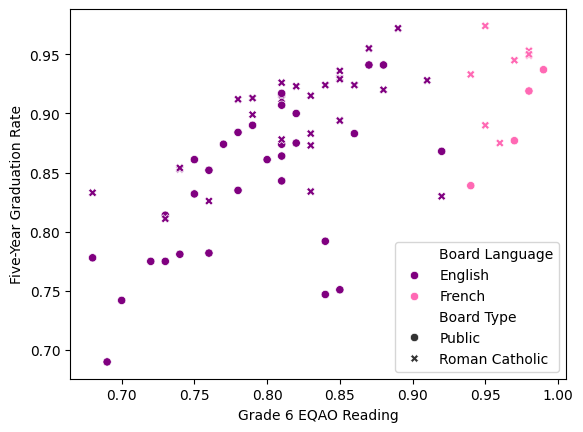

In [ ]:
# Represent multiple variables with different visual elements of the graph

gradrategraph = sns.scatterplot(data=df, 
                                x="Grade 6 EQAO Reading",
                                y="Five-Year Graduation Rate",
                                style="Board Type", # Identify data points by district school board type: Public or Roman Catholic
                                hue="Board Language", # Identify data points by district school board : English or French
                                palette=["purple","hotpink", "deepskyblue", "yellowgreen"]) # Select marker colours



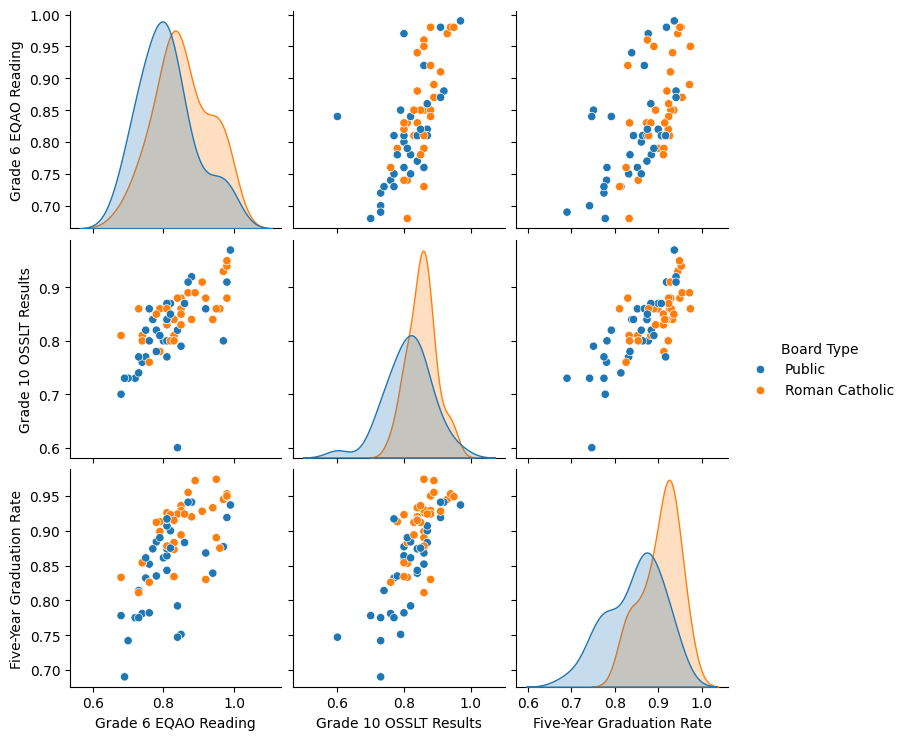

In [54]:
# Plot selected columns of interest and colour by Board Type

sns.pairplot(data = df,
              vars=['Grade 6 EQAO Reading', 'Grade 10 OSSLT Results', 'Five-Year Graduation Rate'],
              hue = 'Board Type')


In [42]:
# Print the exact column names
print(df.columns.tolist())

# Check if the column exists
print('Five-Year Graduation Rate' in df.columns)

['Board Number', 'Board Name', 'Board Language', 'Board Type', 'Region ', 'City', 'Grade 6 EQAO Reading', 'Progress in Grade 6 EQAO Reading Results', 'Grade 10 OSSLT Results', 'Progress in Grade 10 OSSLT Results ', 'Credit Accumulation by the end of Grade 10', 'Progress in Credit Accumulation by the end of Grade 10', 'Credit Accumulation by the end of Grade 11', 'Progress in Credit Accumulation by the end of Grade 11', 'Four Year Graduation Rate 2020-2021 Grade\xa09 Cohort', 'Progress in Four Year Graduation Rate 2020-2021 Grade\xa09 Cohort', 'Five Year Graduation Rate  2019-2020 Grade\xa09 Cohort', 'Progress in Five Year Graduation Rate  2019-2020 Grade\xa09 Cohort']
False


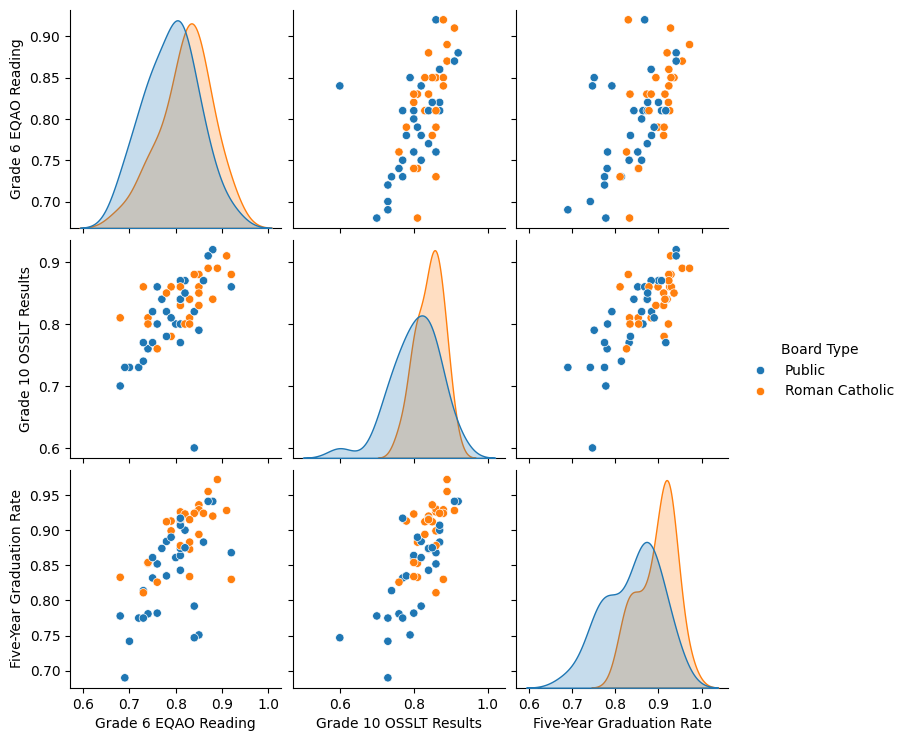

In [ ]:
# Remove French boards from plot since their EQAO results are higher and non-equivalent with English EQAO results

sns.pairplot(data=df[df['Board Language'] == 'English'],
             vars=['Grade 6 EQAO Reading', 'Grade 10 OSSLT Results', 'Five-Year Graduation Rate'],
             hue='Board Type')


Text(0.5, 1.02, 'English Language Boards')

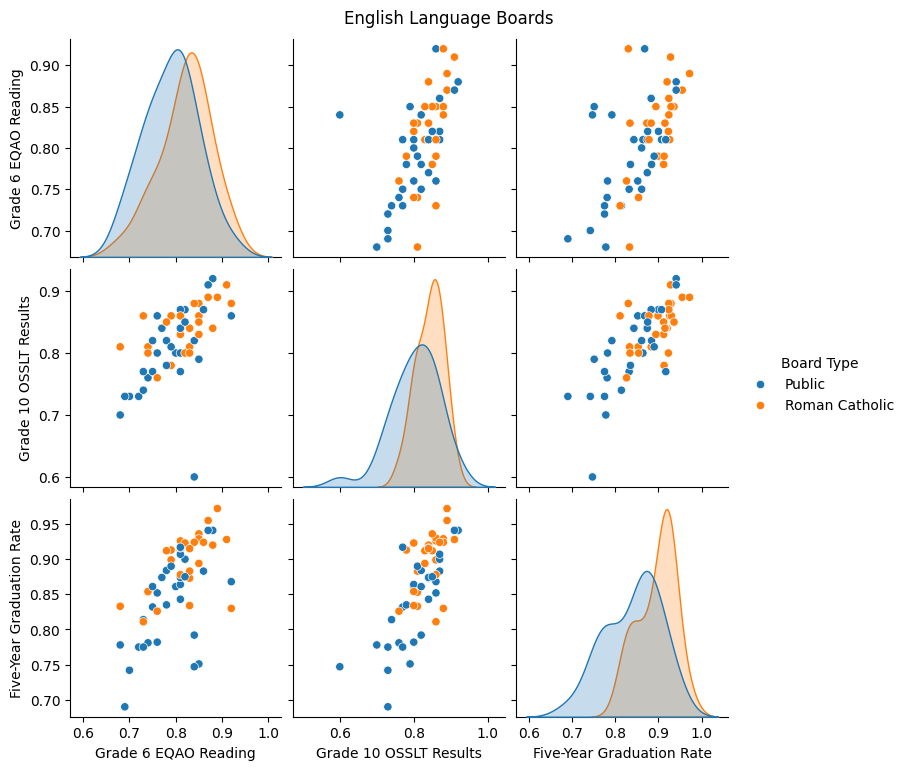

In [ ]:
# English boards only - Add plot title

english_plot = sns.pairplot(data=df[df['Board Language'] == 'English'],
                            vars=['Grade 6 EQAO Reading', 'Grade 10 OSSLT Results', 'Five-Year Graduation Rate'],
                            hue='Board Type')
english_plot.figure.suptitle('English Language Boards', y=1.02) # Add figure title 

Final submission data visualization figure: Seaborn pairplot for plotting pairwise relationship between five-year graduation and Grades 10 or 11 credit accumulation, by distict school board geographical location (Regions: North, East, West, Central, Toronto)

Refer to https://seaborn.pydata.org/tutorial/axis_grids.html (see bottom of webpage)
Refer to seaborn.pairplot https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot
For palette: https://seaborn.pydata.org/tutorial/color_palettes.html
For aesthetics: https://seaborn.pydata.org/tutorial/aesthetics.html
For Seaborn theme settings: https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
For markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
For figure title, etc.: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.suptitle.html#matplotlib.figure.Figure.suptitle
For figure note: https://matplotlib.org/stable/users/explain/text/text_intro.html
For additonal coding and vizualization examples: Cremonini, M. (2024). *Data Visualization in R and Python*. (1st ed.). John Wiley & Sons, Incorporated.

Text(0.5, -0.01, 'Data Source: Ontario Open Data: School Board Achievements and Progress')

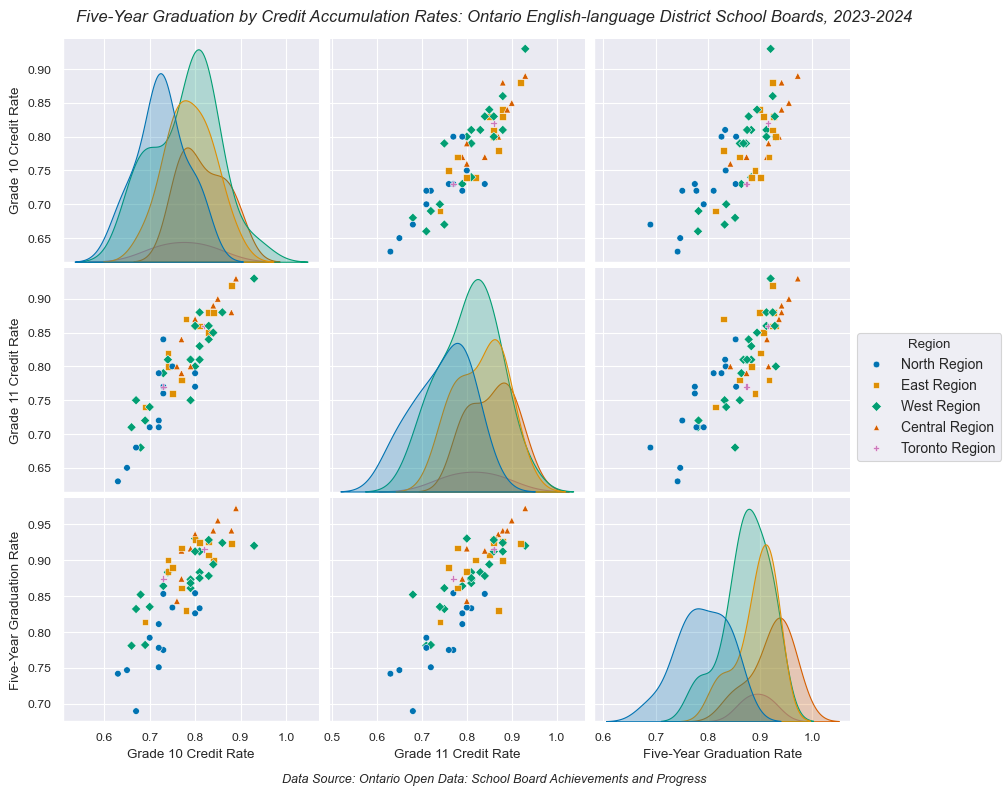

In [ ]:
# Generate structured multi-plot grid for Ontario English-language District School Boards
# Three dimensions: rows and columns variables ('Grade 10 Credit Rate', 'Grade 11 Credit Rate', 'Five-Year Graduation Rate') and hue (North, East, Weest, Central, and Toronto Regions)

# sns.color_palette("colorblind") # Select colourblind Seaborn palette to optimize accessibility for categorical data representation (i.e., regions)
sns.set_theme(context='paper', palette='colorblind', font='sans-serif') # Select plot theme elements to improve audience accessibility
english_plot = sns.pairplot(data=df[df['Board Language'] == 'English'], # Select English-language district school boards from df dataset
                            vars=['Grade 10 Credit Rate', 'Grade 11 Credit Rate', 'Five-Year Graduation Rate'], # Select three df quantitative variables to compare
                            hue='Region', # Identify scatterplot datapoints by district school board category
                            markers=["o", "s", "D", "^", "P"], # Add markers to distinguish tegions variable levels more readily
                            palette='colorblind') # Confirm the the hue palette for mapping the Region variables 
english_plot._legend.remove() # Remove the default legend generated with the sns.pairplot function 
english_plot.add_legend(frameon=True, fontsize=10) # Add a new, larger legend that can be customized
english_plot.figure.suptitle('Five-Year Graduation by Credit Accumulation Rates: Ontario English-language District School Boards, 2023-2024',
                              y=1.02, fontsize=12, style='oblique', ha='center') # Add figure super title and adjust its position relative to the entire figure area
plt.figtext(0.5, -0.01, 'Data Source: Ontario Open Data: School Board Achievements and Progress', 
            ha='center', fontsize=9, style='italic') # Add data source note at the bottom of the figure

In [111]:
# Check current seaborn style parameters
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}